<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">🦜 LangChain Multiple chains simply Explained 🧭</div>

<div style="text-align: center;">
"The Tragedy of Darth Plagueis the Wise" - all visuals created with DALL·E 3.
</div>

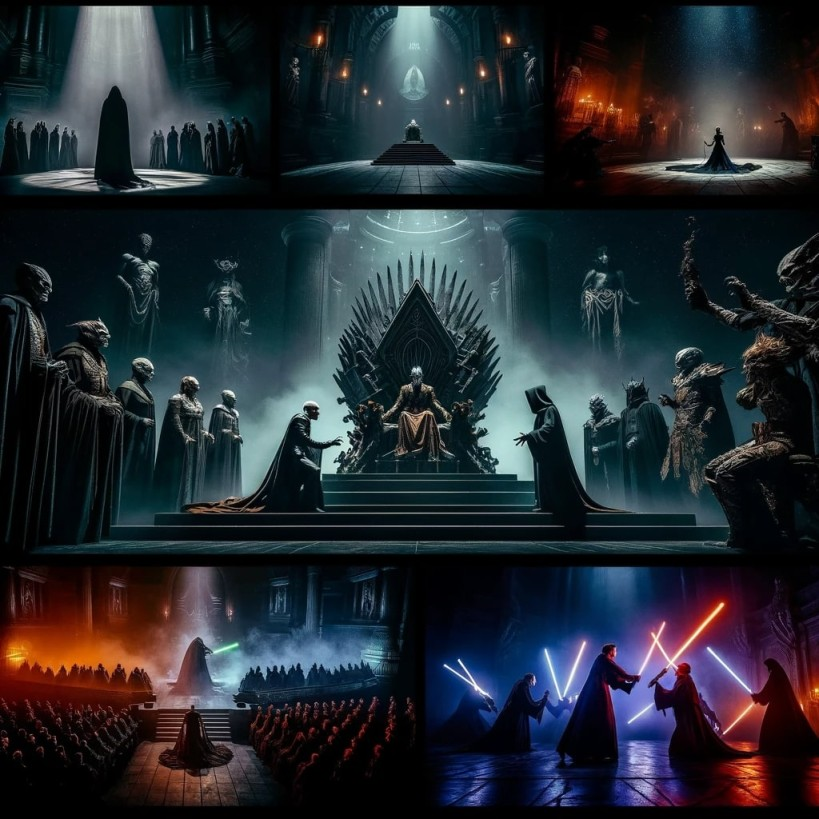

<a id="toc"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Table of Contents</div>

<a id="toc"></a>
- [1. Set up](#1)
    - [1.1 Install and load Libraries](#1.1)
    - [1.2 Setting up the LLM model](#1.2)
- [2. Prompts](#2)
- [3. Chains](#3)
    - [3.1 Creating individual chains](#3.1)
    - [3.2 Invoking chains](#3.2)
    - [3.3 Combine chains](#3.3)
    - [3.4 Invoking combined chains](#3.4)
- [4. My other notebooks](#4)
- [5. References](#5)

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span> Set up</div>

<a id="1.1"></a>
## <b>1.1 <span style='color:#E1B12D'>Install and load Libraries</span></b>

In [17]:
pip install langchain openai langchain-community

Note: you may need to restart the kernel to use updated packages.


In [18]:
from langchain.chat_models import ChatOpenAI              # For creating chat models using language models
from langchain.schema import StrOutputParser              # For parsing output strings from the language model
from langchain.prompts import PromptTemplate              # For creating prompt templates in LangChain
from langchain.schema.runnable import RunnablePassthrough # For chaining different tasks
import textwrap                                           # Standard Python library for wrapping text
import openai                                             # OpenAI library for interacting with GPT models

In [19]:
# Loading OPEN AI API key from environment variables
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
openai_api_key = user_secrets.get_secret("OPENAI_API_KEY")

In [20]:
# Checking if the API key has been loaded
if openai_api_key:
    print("API key loaded successfully.")
else:
    print("Failed to load OPENAI API key.")

API key loaded successfully.


<a id="1.2"></a>
## <b>1.2 <span style='color:#E1B12D'>Setting up the LLM model</span></b>

In [21]:
# Creating an instance of ChatOpenAI from LangChain
# Sets the behavior and model type of the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo", openai_api_key=openai_api_key)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span> Prompts</div>

In [22]:
# Creating prompt templates
# This utilizes LangChain's PromptTemplate to create structured inputs for the language model
# Each template has placeholders for dynamic content

synopsis_prompt = PromptTemplate.from_template(
    """You are a playwright. Given the title of play, it is your job to write a synopsis for that title.
    Title: {title}
    Playwright: This is a synopsis for the above play:"""
)

review_prompt = PromptTemplate.from_template(
    """You are a play critic from the New York Times. Given the synopsis of play, it is your job to write a review for that play.
    Play Synopsis: {synopsis}
    Review from a New York Times play critic of the above play:"""
)

summary_prompt = PromptTemplate.from_template(
    """You are a play critic from the New York Times. Given the Review of play, it is your job to write a 2 sentence summary of that play.
    Play Review: {review}
    Two sentence summary of the play:"""
)

In [23]:
# Setting the initial input for the chain
title = "The Tragedy of Darth Plagueis the Wise"

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span> Chains</div>

<a id="3.1"></a>
## <b>3.1 <span style='color:#E1B12D'>Creating individual chains</span></b>

The **StrOutputParser** is a component of the LangChain framework, specifically designed for processing language model outputs.

The StrOutputParser is a class within the LangChain framework, deriving from the BaseTransformOutputParser class. Its principal role is to convert the output of a language model into a string format. This feature is particularly useful for tasks that require the language model's output in a string format for further processing or analysis. Its role in structuring and parsing responses makes it an essential tool in the development of complex language model applications.

In [24]:
# Creating individual chains for each task
# Each chain combines a prompt template, the language model, and a string output parser
# This aligns with LangChain's design for chaining language model tasks

synopsis_chain = synopsis_prompt | llm | StrOutputParser()
review_chain = review_prompt | llm | StrOutputParser()
summary_chain = summary_prompt | llm | StrOutputParser()

<a id="3.2"></a>
## <b>3.2 <span style='color:#E1B12D'>Invoke chains</span></b>

We can invoke all chains step by step and print the results. Later we will do that in one step only.

In [25]:
# Invoking the synopsis chain with the initial input
synopsis = synopsis_chain.invoke({"title": title})

# Set the desired width
wrap_width = 80

# Splitting the synopsis into paragraphs
paragraphs = synopsis.split('\n\n')

# Formatting each paragraph
formatted_synopsis = '\n\n'.join([textwrap.fill(paragraph, width=wrap_width) for paragraph in paragraphs])

# Print the formatted synopsis
print('Synopsis')
print('----------------------------------')
print(formatted_synopsis)

Synopsis
----------------------------------
The Tragedy of Darth Plagueis the Wise follows the rise and fall of the powerful
Sith Lord, Darth Plagueis. Known for his mastery of the dark side of the Force
and his ability to manipulate midi-chlorians to create life, Plagueis becomes a
feared and respected figure in the galaxy. However, his thirst for power and
immortality ultimately leads to his downfall as he is betrayed by his own
apprentice, Darth Sidious. The play explores themes of temptation, betrayal, and
the consequences of unchecked ambition in a world of darkness and deceit.
Ultimately, it serves as a cautionary tale of the dangers of the dark side and
the tragic fate that awaits those who succumb to its seductive allure.


In [26]:
# Invoking the review chain with the initial input
review = review_chain.invoke({"synopsis": synopsis})

# Set the desired width
wrap_width = 80

# Splitting the review into paragraphs
paragraphs = review.split('\n\n')

# Formatting each paragraph
formatted_review = '\n\n'.join([textwrap.fill(paragraph, width=wrap_width) for paragraph in paragraphs])

# Print the formatted review
print('Review')
print('----------------------------------')
print(formatted_review)

Review
----------------------------------
The Tragedy of Darth Plagueis the Wise is a mesmerizing and chilling exploration
of the corrupting influence of power and ambition. The production immerses the
audience in a world of darkness and deceit, masterfully capturing the seductive
allure of the dark side.

The performances are nothing short of spectacular, with the actor portraying
Darth Plagueis delivering a truly haunting and compelling portrayal of a once
noble figure consumed by his own desires. The chemistry between Plagueis and his
treacherous apprentice, Darth Sidious, is palpable and electrifying, adding a
layer of complexity to their twisted relationship.

The play's themes of temptation, betrayal, and the consequences of unchecked
ambition are powerfully depicted, leaving the audience with a haunting reminder
of the dangers that lurk within us all. The direction and staging are equally
impressive, creating a sense of foreboding and impending doom that lingers long
after the f

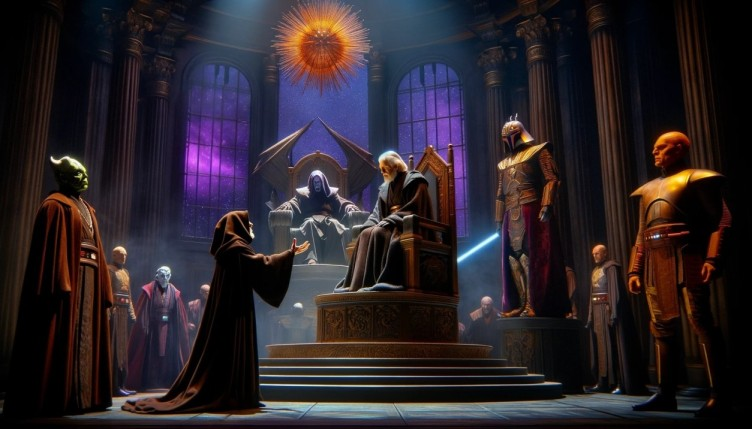

In [27]:
# Invoking the summary chain with the initial input
summary = summary_chain.invoke({"review": review})

# Set the desired width
wrap_width = 80

# Wrap the text
wrapped_summary = textwrap.fill(summary, width=wrap_width)

# Print the wrapped text
print('Short Summary')
print('----------------------------------')
print(wrapped_summary)

Short Summary
----------------------------------
The Tragedy of Darth Plagueis the Wise is a gripping exploration of power and
ambition, with spectacular performances and a haunting portrayal of corruption.
The play delves into themes of temptation and betrayal, leaving a lasting impact
on the audience as a cautionary tale of the dangers of the dark side.


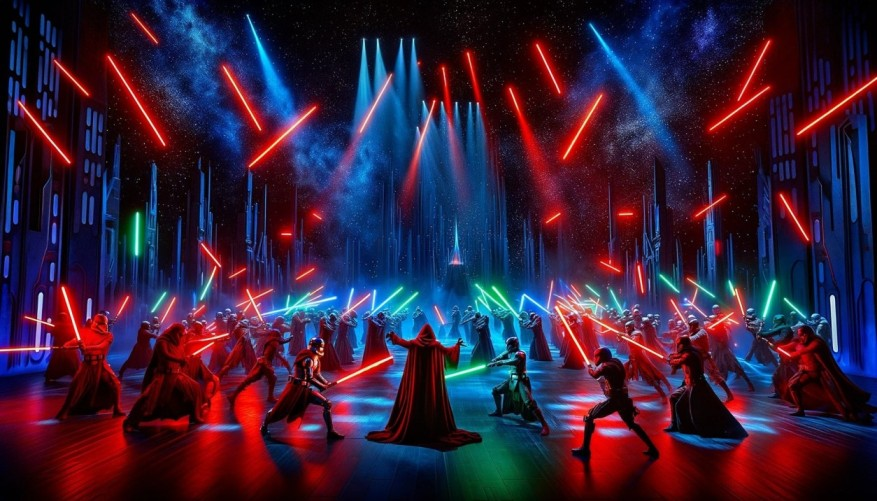

<a id="3.3"></a>
## <b>3.3 <span style='color:#E1B12D'>Combine chains</span></b>

Now we will use RunnablePassthrough.assign() to cobine all the chains.

In [28]:
# Combining the chains into a single, sequential workflow
# Using RunnablePassthrough.assign() to pass the output of one chain as the input to the next
chain = (
    {"synopsis": synopsis_chain} 
    | RunnablePassthrough.assign(review=review_chain)
    | RunnablePassthrough.assign(summary=summary_chain)
)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="3.4"></a>
## <b>3.4 <span style='color:#E1B12D'>Invoke combined chain</span></b>

In [29]:
# Invoking the combined chain with the initial input
result = chain.invoke({"title": title})

In [30]:
# Wrapping the output text for readability
wrap_width = 80  # Defines the maximum width of each line in the output
print("Output:")
print("-------------------------------------------------------------------")
for key, value in result.items():
    print(f"{key.capitalize()}:")
    paragraphs = value.split('\n\n')
    for paragraph in paragraphs:
        wrapped_paragraph = textwrap.fill(paragraph, width=wrap_width)
        print(wrapped_paragraph)
        print()

Output:
-------------------------------------------------------------------
Synopsis:
The Tragedy of Darth Plagueis the Wise is a gripping tale of power, betrayal,
and the consequences of seeking ultimate control. Set in a galaxy far, far away,
the play follows the rise and fall of the infamous Sith Lord, Darth Plagueis, as
he attempts to defy death and manipulate the Force to his advantage. As his
thirst for power grows stronger, Darth Plagueis becomes consumed by his own
ambition, leading to a tragic downfall that ultimately seals his fate. With
themes of greed, loss, and the corrupting nature of power, The Tragedy of Darth
Plagueis the Wise explores the dark side of the Force and the devastating
consequences of unchecked ambition.

Review:
In "The Tragedy of Darth Plagueis the Wise," audiences are transported to a
galaxy far, far away to witness the captivating and cautionary tale of power and
downfall. This production delves into the complex character of Darth Plagueis, a
Sith Lord

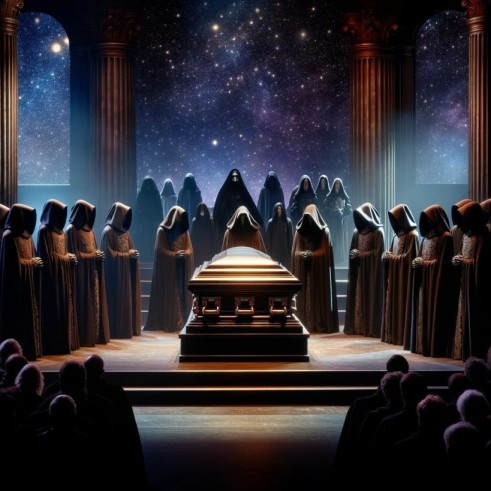

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span> My other notebooks</div>

Here is a list of the notebooks I have completed so far:

* [Face Image Enhance Upscale With GFPGAN Explained](https://www.kaggle.com/code/marcinrutecki/face-image-enhance-upscale-with-gfpgan-explained)
* [Stable Diffusion XL Hugging Face API Explained](https://www.kaggle.com/code/marcinrutecki/stable-diffusion-xl-hugging-face-api-explained)
* [One Hot Encoding - everything you need to know](https://www.kaggle.com/code/marcinrutecki/one-hot-encoding-everything-you-need-to-know)
* [Stacking classifier - ensemble for great results](https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results)
* [How to create a meaningful EDA](https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda)
* [GridSearchCV + KFold CV: The Right Way](https://www.kaggle.com/code/marcinrutecki/gridsearchcv-kfold-cv-the-right-way)
* [Voting Classifier for Better Results](https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results)
* [SMOTE and Tomek Links for imbalanced data](https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data)
* [Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
* [Regression Models Evaluation Metrics](https://www.kaggle.com/code/marcinrutecki/regression-models-evaluation-metrics)
* [Clustering methods - comprehensive study](https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study)
* [Outlier detection methods!](https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods)
* [Multicollinearity - detection and remedies](https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies)
* [Standardize or Normalize - Ultimate Answer](https://www.kaggle.com/code/marcinrutecki/standardize-or-normalize-ultimate-answer)

<a id="5"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span> References</div>

* [LangChain](https://python.langchain.com/docs/get_started/introduction)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>